In [2]:
import pandas as pd

# long data 만들기
- 각 변수는 하나의 컬럼에 배치
- 각 관측치는 한행에 1건씩 분리되어 배치
- 각 값은 개별 셀에 배치

- melt()
- pivot()
- pivot_table() : 집계 함수를 적용

In [3]:
#pew data load
#C:\Users\Admin\hipython\data\pew.csv
pd.read_csv(r'C:\Users\Admin\hipython\data\pew.csv')  #raw data # raw-string -전부다 문자열이야

#\가 특수기호 줄바꿈

df = pd.read_csv('./data/pew.csv') #얘도 똑같은 방법임
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

#null 하나도 없어서 null처리 하나도 안해도 됨
#파워쿼리에서 언피봇했던 것처럼... 데이터 180건 정도 됨..


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [5]:
df.head(5) #롱데이터로 만든다는건...

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [6]:
df.melt(id_vars='religion').sort_values('religion').head(18)  #메소드체인

,religion,variable,value
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60
108,Agnostic,$75-100k,122
18,Agnostic,$10-20k,34
90,Agnostic,$50-75k,137
72,Agnostic,$40-50k,76
54,Agnostic,$30-40k,81


In [7]:
df_melt_new = df.melt(id_vars='religion', var_name='income', value_name='count')  #변수 설정을 해줘야 함
df_melt_new

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [8]:
#뽑을 조건
cond = df_melt['religion'] == 'Agnostic'

NameError: name 'df_melt' is not defined

In [ ]:
df_melt.loc[cond]

,religion,variable,value
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


In [ ]:
# variable > income

# 내버전 df_melt ['variable'] = 'income'

df_melt_rename = df_melt.rename(columns={ 'variable' :'income', 'value' : 'count' })

# value > count

#내 버전 df_melt ['value'] = 'count'
#안바뀜 - 새로운 변수로 주던가 아니면 inplace하던가... =>왜??

df_melt_rename

,religion,income,count
0,Agnostic,income,count
1,Atheist,income,count
2,Buddhist,income,count
3,Catholic,income,count
4,Don’t know/refused,income,count
...,...,...,...
175,Orthodox,income,count
176,Other Christian,income,count
177,Other Faiths,income,count
178,Other World Religions,income,count


In [ ]:
df_melt = df.melt(id_vars='religion') .rename(columns={'variable' : 'income', 'value' : 'count'})

In [ ]:
df_pivot = df_melt_new.pivot(
    index='religion',
    columns='income',
    values='count'

).reset_index() #melt와 pivot은 상대되는 개념이다

#.reset_index()는 인덱스 이중으로 돼있을 때 쓸 수 있음


In [ ]:
df_pivot

income,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116
5,Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
6,Hindu,9,48,7,9,11,34,47,1,54,37
7,Historically Black Prot,244,81,236,238,197,223,131,228,78,339
8,Jehovah's Witness,27,11,24,24,21,30,15,20,6,37
9,Jewish,19,87,25,25,30,95,69,19,151,162


In [ ]:
df_pivot = df_melt_new.pivot_table(
    index='religion',
    columns='income',
    values='count',
    aggfunc='sum'

)
df_pivot

income,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84,96
Atheist,27,59,37,52,35,70,73,12,74,76
Buddhist,21,39,30,34,33,58,62,27,53,54
Catholic,617,792,732,670,638,1116,949,418,633,1489
Don’t know/refused,14,17,15,11,10,35,21,15,18,116
Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
Hindu,9,48,7,9,11,34,47,1,54,37
Historically Black Prot,244,81,236,238,197,223,131,228,78,339
Jehovah's Witness,27,11,24,24,21,30,15,20,6,37


In [ ]:
df.tail(5)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
13,Orthodox,13,17,23,32,32,47,38,42,46,73
14,Other Christian,9,7,11,13,13,14,18,14,12,18
15,Other Faiths,20,33,40,46,49,63,46,40,41,71
16,Other World Religions,5,2,3,4,2,7,3,4,4,8
17,Unaffiliated,217,299,374,365,341,528,407,321,258,597


In [ ]:
df.describe()

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,107.222222,154.500000,186.500000,183.444444,171.388889,288.055556,221.666667,177.611111,144.888889,340.055556
std,168.931784,255.172433,309.891869,291.470354,271.144446,458.442436,345.078849,275.679724,205.224952,530.523878
min,1.000000,2.000000,3.000000,4.000000,2.000000,7.000000,3.000000,4.000000,4.000000,8.000000
25%,12.250000,14.750000,17.000000,15.750000,15.000000,34.250000,25.250000,22.500000,23.750000,41.250000
50%,20.000000,27.000000,33.500000,40.000000,34.000000,66.500000,65.500000,48.500000,53.500000,74.500000
75%,170.000000,193.000000,192.000000,198.750000,166.750000,201.500000,128.750000,103.500000,134.250000,294.750000
max,575.000000,869.000000,1064.000000,982.000000,881.000000,1486.000000,949.000000,792.000000,634.000000,1529.000000


In [ ]:
df.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [ ]:
pd.read_csv(r'C:\Users\Admin\hipython\data\billboard.csv')

df1 = billboard_df = pd.read_csv('./data/billboard.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [ ]:
df1.head(5)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.tail(5)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,matchbox twenty,Bent,4:12,2000-04-29,60,37.0,29.0,24.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.describe()

,year,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.columns 

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [ ]:
id_vars= billboard_df.columns[:4].tolist()
id_vars

['year', 'artist', 'track', 'time']

In [ ]:
b_df_melt = billboard_df.melt(id_vars=id_vars, var_name= 'week', value_name='rank')
b_df_melt

,year,artist,track,time,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,date.entered,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,date.entered,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,date.entered,2000-04-08
3,2000,3 Doors Down,Loser,4:24,date.entered,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,date.entered,2000-04-15
...,...,...,...,...,...,...
24404,2000,Yankee Grey,Another Nine Minutes,3:10,wk76,NaN
24405,2000,"Yearwood, Trisha",Real Live Woman,3:55,wk76,NaN
24406,2000,Ying Yang Twins,Whistle While You Tw...,4:19,wk76,NaN
24407,2000,Zombie Nation,Kernkraft 400,3:30,wk76,NaN


# apply()

In [ ]:
df = pd.DataFrame(
    {
        "a":[10,20,30],
        "b":[20,30,40]
    }
)
df

,a,b
0,10,20
1,20,30
2,30,40


In [ ]:
df**2

,a,b
0,100,400
1,400,900
2,900,1600


In [ ]:
df/10 #veterization - 벡터화  #파이썬의 연산자 적용 

,a,b
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0


In [ ]:
def make_sq(x, e=2):
    return x **e

In [ ]:
df.apply(make_sq, e=3) #함수이지만 파라미터처럼 쓸 수 있다

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [ ]:
import pandas as pd

# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}
sal_df = pd.DataFrame(data)
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Salary  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [ ]:
#데이터 형식 바꿔보기 - 20대, 30대, 40대 이런식으로

In [ ]:
def age_category(age):
    if age<30 :
        return '20대'
    elif age<40 :
        return '30대'
    else:
        return '40대 이상'

#이 메소드는 매개변수가 없으니까.. apply는 하나하나 다 꺼내서 age_category한테 넘겨주는데 없으니까... 에러 -> age값 채워주기


In [ ]:
sal_df['Age_category'] = sal_df['Age'].apply(age_category)

# 앞에 'Age_category'대신 'Age' 쓰면 원래 데이터가 날아가니까

In [ ]:
sal_df

,Name,Age,Salary,Age_category
0,Alice,25,5000,20대
1,Bob,45,7000,40대 이상
2,Charlie,35,6500,30대
3,David,32,5500,30대
4,Eva,28,6000,20대


In [ ]:
#보너스 컬럼만들기 20% - apply로 해보기

# 내가 한 방식 

def bonus(salary): 
 return 0.2 * sal_df['Salary'] 

sal_df['bonus'] = sal_df['Salary'].apply(bonus)


ValueError: Columns must be same length as key

In [ ]:
#선생님방식 - rate까지!!

def calc_bonus(salary, rate=0.2):
    return salary* rate

sal_df['bonus'] = sal_df['Salary'].apply(calc_bonus, rate=0.3)
sal_df

,Name,Age,Salary,Age_category,bonus
0,Alice,25,5000,20대,1500.0
1,Bob,45,7000,40대 이상,2100.0
2,Charlie,35,6500,30대,1950.0
3,David,32,5500,30대,1650.0
4,Eva,28,6000,20대,1800.0


In [ ]:
#내거 수정버전
def bonus(salary): 
 return 0.2 * salary 

sal_df['bonus'] = sal_df['Salary'].apply(bonus)
sal_df


,Name,Age,Salary,Age_category,bonus
0,Alice,25,5000,20대,1000.0
1,Bob,45,7000,40대 이상,1400.0
2,Charlie,35,6500,30대,1300.0
3,David,32,5500,30대,1100.0
4,Eva,28,6000,20대,1200.0


#  데이터 병합

In [ ]:
#dataframe 생성
df_1 = pd.read_csv('./data/concat_1.csv')
df_2 = pd.read_csv('./data/concat_2.csv')
df_3 = pd.read_csv('./data/concat_3.csv')

In [ ]:
df_1, df_2, df_3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [ ]:
# column list가 동일 > 병합
total_df = pd.concat([df_1, df_2, df_3], ignore_index=True)
total_df

#인덱스까지 다 가지고 와버림
total_df.loc[3]

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object

In [ ]:
#새로운 인덱스가 필요함
#total_df.iloc[3]

#ignore index or reset index
total_df.reset_index()
#기존 index 필요없으면 drop 해주면 됨

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,4,a4,b4,c4,d4
5,5,a5,b5,c5,d5
6,6,a6,b6,c6,d6
7,7,a7,b7,c7,d7
8,8,a8,b8,c8,d8
9,9,a9,b9,c9,d9


In [ ]:
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


# 새로운 행 추가

In [ ]:
#시리즈 추가 - 컬럼맞춰야함 -- 시리즈는 기본적으로 아래로 붙어서..? - NaN은 뭐야?

add_ser = pd.Series(['a100', 'b100', 'c100', 'd100'])
add_ser

0    a100
1    b100
2    c100
3    d100
dtype: object

In [ ]:
total_df_add = pd.concat([total_df, add_ser]) #xxxx
#total_df_add

In [ ]:
col_list = total_df.columns.to_list()

In [ ]:
#dataframe으로 만든다
empty_df = pd.DataFrame(columns= col_list)
#empty_df[0] = add_ser
empty_df

,A,B,C,D


In [ ]:
add_ser.index=empty_df.columns
add_ser

A    a100
B    b100
C    c100
D    d100
dtype: object

In [ ]:
empty_df.loc[0] = add_ser
empty_df

,A,B,C,D
0,a100,b100,c100,d100


In [ ]:
new_total_df = pd.concat([total_df, empty_df], ignore_index=True)
new_total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [ ]:
#위에까지 선생님 버전

In [ ]:
#pd.concat([df_con_total, add_ser], ignore_index=True)

NameError: name 'df_con_total' is not defined

In [ ]:
df_con_total =  pd.concat([to])

total_add
total_df_add = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [ ]:
# dataframe으로 만들어줘야함
empty_df = pd.DataFrame(columns = col_list)
# 없다고 떠서
empty_df.loc[0] = add_ser
empty_df

NameError: name 'col_list' is not defined

In [ ]:
col_list = total_df.columns.to_list()

In [ ]:
pd.DataFrame(columns = col_list)
#add_ser

시리즈를 행으로 만들어서 concat

- 원본과 동일한 컬럼을 갖는 데이터프레임 생성
- 컬럼이름 = 인덱스이름 시리즈 생성
- 빈데이터프레임에 행으로 시리즈를 추가
- concat(원본, 빈데이터프레임)

똑같은 모양 가지고 있어야 함 - concat 행 병합
사실은 axis라는 옵션이 있음 axis = 0 >> row
똑같은데 axis = 1 >> column모양

# merge
- 키를 기준으로 합친다.
- sql에서 join > join 해서  양쪽에 customer ID가 있으니까 조인해서 하나의 테이블로 가져오면 편하긴 함
이제는 db 권한 줄테니 알아서 꺼내가 라는 방식 -> sql을 잘 만들면 셀렉트해서... 키만 똑같고 컬럼의 값들이 다름!!!

In [ ]:
#매출 데이터
sales_data = pd.DataFrame({ 
    'CustomerID': [101, 102, 103, 104], 
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'], 
    'Amount': [250, 300, 150, 400] })

#고객 데이터
customer_data = pd.DataFrame({ 
    'CustomerID': [101, 102, 103, 105], 
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'], 'Region': ['North', 'South', 'East', 'West'] })

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Date        4 non-null      object
 2   Amount      4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Name        4 non-null      object
 2   Region      4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [ ]:
#객체에 있는 머지보다는 pd에 있는 머지가 좀더 직관적임

In [ ]:
pd.merge(customer_data, sales_data, on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150


In [ ]:
pd.merge(customer_data, sales_data, how='left', on='CustomerID')  #left로 걸어서 105가 나오고, right로 걸면 104가 나옴

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,105,Eva,West,NaN,NaN


In [ ]:
pd.merge(customer_data, sales_data, how='right', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150
3,104,NaN,NaN,2023-01-07,400


In [ ]:
how - 병합 기준 지정
- left
- right
- inner(default)
- outer

on - 병합을 위한 key 지정

# 그룹 연산 - 기본적으로 그룹화한것의 대표값을 보겠다

groupby() + aggregation 집계

In [ ]:
gap_df = pd.read_csv('./data/gapminder.tsv', sep='\t')
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [ ]:
gap_df.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
gap_df.tail(5)

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [ ]:
gap_df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [ ]:
gap_df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

copy path 가능 - 데이터 우클릭 하면 주소 나옴!!

데이터 분석할 때 지피티한테 주고 내용 여기 붙여넣으면 좋음

In [ ]:
#gap_df.loc[:, 'country']  #여기서 중복되는 애들은 어떻게 빼지? -> unique


gap_df['country'].unique().shape
#어레이....니까 shape 속성 활용(?)
#두번째 방법이 더 직관적임
#국가별 기대수명...

(142,)

In [ ]:
gap_df.loc[:, 'year'].unique().shape

(12,)

In [ ]:
gap_df['continent'].unique().shape  #대률별로도 볼 수 있겠네.. 

(5,)

In [ ]:
# 이때 쓰는게 groupby -메소드
gap_df.groupby('country')[['lifeExp', 'pop']].sum()
# 컬럼 여러개 넣으려면 리스트로
#.sum()뺀 나머지는 데이터프레임이 아니다(?)

,lifeExp,pop
country,,
Afghanistan,449.746,189884585
Albania,821.195,30962990
Algeria,708.362,238504874
Angola,454.602,87712681
Argentina,828.725,343226879
...,...,...
Vietnam,689.754,654822851
West Bank and Gaza,723.944,22183278
"Yemen, Rep.",561.365,130118302


In [ ]:
gap_df.groupby('country').get_group('Afghanistan')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [ ]:
#통계함수들 다 됨 - sum 대신에 min..

In [ ]:
#내가 그냥 해봄
gap_df.groupby('continent')[['lifeExp']].sum()

,lifeExp
continent,
Africa,30491.96600
Americas,19397.62100
Asia,23785.70168
Europe,25885.32700
Oceania,1783.82900


In [ ]:
gap_df.groupby('continent')['country'].count()
#근데 마지막은 왜 ()만 있더라..? 

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

In [ ]:
count(), size(), mean(), std(), quantile(), max(), min, sum(), var(), describe()

In [ ]:
country, continent,

In [ ]:
#통계함수들 다 됨 - sum 대신에 min..
count(), size(), mean(),  std(), quantile(),  max(),  min, sum(), var(), describe()

In [ ]:
.agg 하면 한번에 여러 개 다 할 ㅅ

In [ ]:
gap_df.groupby('continent')['country'].agg(['count', 'size', 'mean', 'std', 'quantile', 'max', 'min', 'sum', 'var', 'describe' ])

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
veh_df = pd.read_csv('./data/vehicle_prod.csv')
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6 non-null      object 
 1   2007        6 non-null      float64
 2   2008        6 non-null      float64
 3   2009        6 non-null      float64
 4   2010        6 non-null      float64
 5   2011        6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [ ]:
#이거 해줘야 함!!! - 각 국가가 다 유니크하기 때문에 country를 인덱스로 바꿔주고 싶음
veh_df.rename(columns={'Unnamed: 0':'country'}, inplace=True)
veh_df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
#veh_df.set_index('country', inplace=True) #set보다 한번에 지정하는게 좋음
veh_df  #엥 갑자기 이게 어케된것임? 갑자기 에러뜨고 안됏음

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
#시리즈니까 데이터프레임으로 만드려면 

type(veh_df['2007'])

veh_df[['2007']]   #이렇게 대괄호 한번 더 쏴주기만해도 데이터프레임이 됨... 시리즈 아님

,2007
0,7.71
1,19.02
2,10.47
3,10.87
4,4.04
5,2.01


In [ ]:
veh_df.loc[:, '2007']

0     7.71
1    19.02
2    10.47
3    10.87
4     4.04
5     2.01
Name: 2007, dtype: float64

In [ ]:
veh_df['2007']

0     7.71
1    19.02
2    10.47
3    10.87
4     4.04
5     2.01
Name: 2007, dtype: float64

In [ ]:
veh_df.corr() #상관계수 보여줌

ValueError: could not convert string to float: 'China'

In [ ]:
veh_df.sum() #아래로 합계

country    ChinaEUUSJapanKoreaMexico
2007                           54.12
2008                           50.77
2009                           45.04
2010                           55.68
2011                           57.25
dtype: object

In [ ]:
veh_df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
# 총 생산량 컬럼 추가
veh_df['total_production'] = veh_df.sum(axis=1)

TypeError: can only concatenate str (not "float") to str

In [ ]:
veh_df.loc['total'] = veh_df.sum()

In [ ]:
veh_df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54
total,ChinaEUUSJapanKoreaMexico,54.12,50.77,45.04,55.68,57.25


RecursionError: maximum recursion depth exceeded

RecursionError: maximum recursion depth exceeded

# 결측치 처리 (missing value = 없는 값) - 종종 이상한 글자가 써지는 경우
pd.NA, np.nan (not a number)

In [ ]:
import numpy as np
import pandas as pd
pd.NA, np.nan

(<NA>, nan)

In [ ]:
pd.isnull(np.nan), pd.isnull(pd.NA), pd.isnull(20)

(True, True, False)

In [ ]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}
data

{'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
 'age': [25, nan, 30, 22, nan],
 'score': [90, 85, nan, 88, 95],
 'city': ['Seoul', 'Busan', nan, 'Incheon', 'Seoul']}

In [ ]:
#dataFrame으로 만들기
df_d = pd.DataFrame(data)
df_d

#판다스가 다루는 null이라 NaN

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [ ]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes


In [ ]:
df_d.isnull()

,name,age,score,city
0,False,False,False,False
1,False,True,False,False
2,False,False,True,True
3,False,False,False,False
4,False,True,False,False


In [ ]:
#null 인 값의 갯수
df_d.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [ ]:
#0으로 null을 없앤다 - 어떻게? 데이터를 날리기는 쉽지 않음 - 비슷한 값으로채우기 - 0으로채우기

df_d.dropna()   #inplace 안해서 안날아갔음

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [ ]:
df_d

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [ ]:
df_d.fillna(0) #df의 age만

df_d['age'].fillna(0)
df_d[['age', 'score']].fillna(0)

,age,score
0,25.0,90.0
1,0.0,85.0
2,30.0,0.0
3,22.0,88.0
4,0.0,95.0


In [ ]:
#대표값 : 평균, 중앙값, 최빈값

In [ ]:
df_d.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [ ]:
# age 속성의 평균값으로 null 처리

In [ ]:
avg = df_d['age'].mean()
avg

np.float64(25.666666666666668)

In [ ]:
#정수만 쓰고 싶었어ㅠㅠ
#df_d['age']= df_d['age'].fillna(avg:.0f)
avg = round(df_d['age'].mean())
df_d['age'] = df_d['age'].fillna(avg)
df_d

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,26.0,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,26.0,95.0,Seoul


In [ ]:
# score 속성의 중앙값으로 null 처리

In [ ]:
df_d['score']

0    90.0
1    85.0
2     NaN
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
없애기 / 채우기 / 옆에 있는 애들로 넣기...

In [ ]:
df_d['score'].fillna(method='ffill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9516\1684129411.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_d['score'].fillna(method='ffill')


0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
df_d['score'].fillna(method='bfill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9516\2713620450.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_d['score'].fillna(method='bfill')


0    90.0
1    85.0
2    88.0
3    88.0
4    95.0
Name: score, dtype: float64

# 타이타닉데이터

In [ ]:
titanic_df= pd.read_csv('data/titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
NaN 이 있으면 float으로 형변환함

In [ ]:
titanic_df.isna().sum()
#na는 처리가 안됨 - 판다스는 둘다 같이 처리를 해줌 / isnull로 했을 때 안나오면 왔다갔다 하면 됨

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 평균값은 의미가 없어보이고 중앙값으로 대체하기

titanic_df['Age'].mean(), titanic_df['Age'].median()

#고령자가 더 많아보여서 median으로 하는 걸로

(np.float64(29.69911764705882), 28.0)

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
#age만 잡아야지 아니면 다 바뀜
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_9516\3193124107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [ ]:
titanic_df['Age'].mean()
#평균을 해치지 않는 선에서 대체되었다고 보임

np.float64(29.36158249158249)

In [ ]:
titanic_df['Age'].plot

<Axes: ylabel='Frequency'>

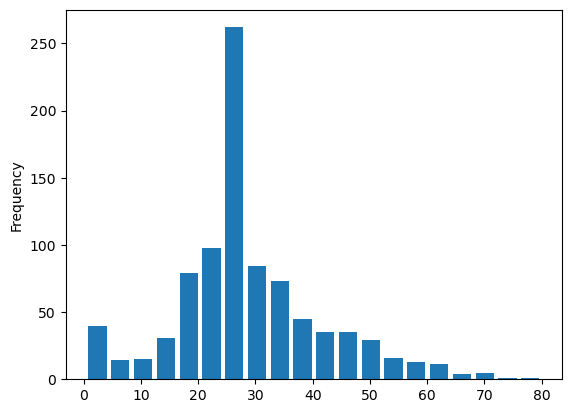

In [ ]:
titanic_df['Age'].plot(kind='hist', bins=20, rwidth=0.8)
#rwidth 는 막대의 넓이

In [ ]:
titanic_df['Cabin'].unique().tolist()
#의사결정할 때 a, b,c방이 뭔지도, 여객선에 사람들이 다 방에 가는지도 이런거 다 파악해야 함

#전처리 어려운 이유 알겠음 - c85 같은 방이었더 ㄴ사람들이 살아남았는지....

[nan,
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [ ]:
#'unknown'으로 채우기
titanic_df['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
titanic_df['Cabin'].value_counts().head(5)

Cabin
Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
Name: count, dtype: int64

In [ ]:
#Embarked 속성 - 뭐로 채우면 좋을지
titanic_df['Embarked'].unique().tolist()

#S : Southampton(UK)
#C : Cherbourg(France)
#Q : Queenstown(Ireland - now known as Cobh)

#결측치 2개니까 최빈값으로 대체하거나, 옆에 있는애들로 대체해도 될 것 같은데?


['S', 'C', 'Q', nan]

In [ ]:
#내 답변 - 최댓값이랑 최빈값은 다르다!! 사실 다른거 알고있었는데 최빈값을 몰라서 그랬음..
titanic_df['Embarked'].fillna(titanic_df['Embarked'].max(), inplace=True)

#지피티 답변 - 두줄
#mode_val = titanic_df['Embarked'].mode()[0]
# titanic_df['Embarked'].fillna(mode_val, inplace=True)
# mode()는 최빈값을 Series로 반환해

#한줄 titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


TypeError: '>=' not supported between instances of 'str' and 'float'

In [ ]:
# 이 데이터는 전처리 할 게 정말정말 많음

## 라벨인코딩

In [ ]:
#label encoding
titanic_df['Sex'].map({'male':0, 'female':1})

다른데서 0,1,2,3,4 - 크기에 의미부여하게 됨..


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

# 범주형 데이터 인코딩
## 원핫인코딩
하나만 1이고 나머지는 다 0으로 깔아주는 것

In [ ]:
# #onehotencoding -머신러닝할 때 유용함
# 컬럼을 두개만들어두고  

# 그래서 둘중에 하나만 1이고 나머지는 0이라서 
# 컬럼이 너무 많으면 문제임... - 국가.. 컬럼이 100개가 될 수 있으니까

In [ ]:
pd.get_dummies(titanic_df, columns=['Sex', 'Embarked']).head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,Unknown,False,True,False,False,True


In [ ]:
#나중에 파생변수만들기도 하게 될 것

# 전처리 연습 : 지하철카드 사용

In [10]:
import pandas as pd

In [11]:
#데이터가 밀려서 맨 앞 사용일자를 index로 인식함 "" 이렇게 데이터가 더 포함돼있어서 컬럼이 6개인데 값이 7개라서 앞에를 인덱스로 처리한듯

df = pd.read_csv(
    'data\CARD_SUBWAY_MONTH_202102.csv',
    usecols=range(6))
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303
16747,20210228,중앙선,양평,3299,3187,20210303
16748,20210228,중앙선,원덕,322,304,20210303
16749,20210228,중앙선,용문,1899,1716,20210303


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [13]:
df.head(3)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204


In [ ]:
#실제 데이터를 보는게 좋음 - 엑셀 말고(죽어버리니까..) 메모장같이 텍스트로...

In [ ]:
# 유니크...
# 라벨인코딩이나 원핫인코딩까지...
# 숫자로 분석할 수 있는것은 승객수가 다임
# 등록일자도 숫자로 돼있어서 날짜로 바꿔줘야 함...

In [14]:
# 노선명 데이터의 종류, 갯수
df['노선명'].count()

np.int64(16751)

In [15]:
df['노선명'].unique()

array(['중앙선', '장항선', '일산선', '우이신설선', '안산선', '수인선', '분당선', '과천선',
       '공항철도 1호선', '경춘선', '경인선', '경의선', '경원선', '경부선', '경강선', '9호선2~3단계',
       '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '2호선', '1호선'],
      dtype=object)

In [16]:
df['노선명'].unique().shape

(25,)

In [17]:
# 9호선 열 병합여부 결정

df['노선명'].value_counts()   #범주형일 때 가능?
#df.groupby(['노선명']).size() 얘도 가능함

노선명
5호선         1484
7호선         1428
2호선         1400
경부선         1092
6호선         1051
분당선          967
3호선          937
경원선          821
경의선          737
4호선          728
9호선          700
중앙선          588
경인선          560
경춘선          532
수인선          504
8호선          476
공항철도 1호선     392
안산선          364
9호선2~3단계     364
우이신설선        364
경강선          308
일산선          282
1호선          280
과천선          224
장항선          168
Name: count, dtype: int64

In [18]:
df.groupby(['노선명']).size()

노선명
1호선          280
2호선         1400
3호선          937
4호선          728
5호선         1484
6호선         1051
7호선         1428
8호선          476
9호선          700
9호선2~3단계     364
경강선          308
경부선         1092
경원선          821
경의선          737
경인선          560
경춘선          532
공항철도 1호선     392
과천선          224
분당선          967
수인선          504
안산선          364
우이신설선        364
일산선          282
장항선          168
중앙선          588
dtype: int64

In [19]:
#선생님은 데이터프레임으로 보고싶다고 하셨음-별도로 시각화하기위해서
df_line_cnt = df.groupby(['노선명']).size().reset_index()
df_line_cnt

,노선명,0
0,1호선,280
1,2호선,1400
2,3호선,937
3,4호선,728
4,5호선,1484
5,6호선,1051
6,7호선,1428
7,8호선,476
8,9호선,700
9,9호선2~3단계,364


In [20]:
import matplotlib.pyplot as plt

c:\Users\Admin\miniconda3\envs\stats\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\stats\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\stats\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\stats\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\stats\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) mis

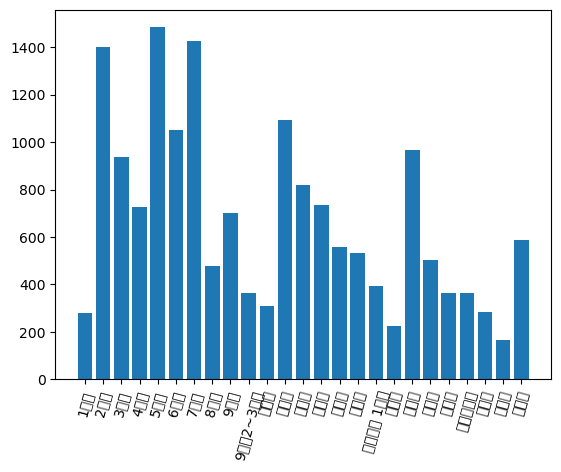

In [21]:
plt.bar(df_line_cnt['노선명'], df_line_cnt[0])
#0컬럼은 size()로 만들어진 Series
plt.xticks(rotation=75)
plt.show()

In [22]:
df[df['노선명']=='1호선']

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
582,20210201,1호선,청량리(서울시립대입구),20132,20332,20210204
583,20210201,1호선,제기동,18424,19171,20210204
584,20210201,1호선,신설동,13013,12965,20210204
585,20210201,1호선,동대문,9591,9240,20210204
586,20210201,1호선,종로5가,20431,20110,20210204
...,...,...,...,...,...,...
16157,20210228,1호선,종로5가,8563,8684,20210303
16158,20210228,1호선,동대문,9136,9572,20210303
16159,20210228,1호선,신설동,6804,6711,20210303
16160,20210228,1호선,제기동,8795,9031,20210303


In [ ]:
# 5호선 각 역별로 막대차트

#지피티 버전
df_line_cnt = df[df['노선명']=='5호선'].groupby('역명').size()
#날짜별로 한 건씩 업데이트 됐으니까 5호선 모든 역이 28건씩 데이터가 업데이트됐음
#모든 역이 28건(2/1에서 2/28일까지 1건씩 존재함)


KeyError: '5호선'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:


from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

In [ ]:
#승차총승객수 하차총승객수 
df_line_5= df[df['노선명']=='5호선']
df_line_5.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
419,20210201,5호선,하남풍산,4629,4624,20210204
420,20210201,5호선,미사,12743,12609,20210204
421,20210201,5호선,마천,5409,5566,20210204
422,20210201,5호선,거여,7499,7119,20210204
423,20210201,5호선,개롱,6040,6218,20210204


In [ ]:
df_line_5.groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()

,역명,승차총승객수,하차총승객수
0,강동,417865,393081
1,개롱,137130,143689
2,개화산,114266,110775
3,거여,170214,163019
4,고덕,190570,189102
5,공덕,296871,314855
6,광나루(장신대),282257,259111
7,광화문(세종문화회관),630350,640269
8,군자(능동),242935,266776
9,굽은다리(강동구민회관앞),206037,195306


In [ ]:
df_line_2 = df[df['노선명'] == '2호선']
df_line_2

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
532,20210201,2호선,용두(동대문구청),2365,2430,20210204
533,20210201,2호선,신정네거리,9269,9599,20210204
534,20210201,2호선,양천구청,6318,6738,20210204
535,20210201,2호선,도림천,1434,1469,20210204
536,20210201,2호선,신설동,3046,3110,20210204
...,...,...,...,...,...,...
16207,20210228,2호선,신설동,2806,2830,20210303
16208,20210228,2호선,도림천,480,477,20210303
16209,20210228,2호선,양천구청,3234,3281,20210303
16210,20210228,2호선,신정네거리,4814,4805,20210303


In [ ]:
df_line_2.groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()

,역명,승차총승객수,하차총승객수
0,강남,1830710,1782108
1,강변(동서울터미널),695308,689779
2,건대입구,757296,798583
3,교대(법원.검찰청),690275,769708
4,구로디지털단지,1285603,1287537
5,구의(광진구청),509864,507242
6,낙성대(강감찬),597804,580323
7,당산,393876,449450
8,대림(구로구청),546016,560634
9,도림천,30287,30993


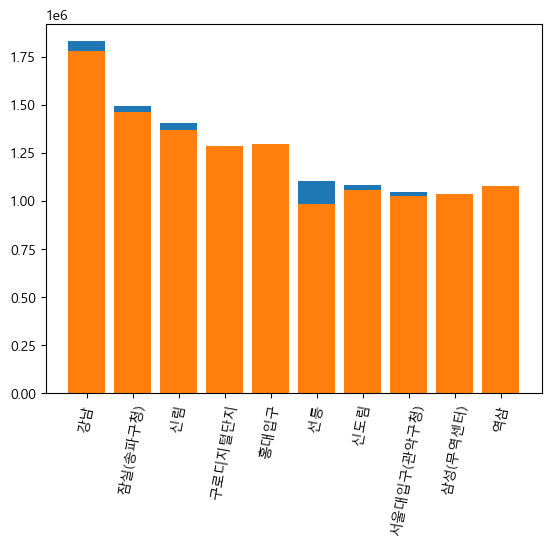

In [ ]:
df_line_2_승객수 = df_line_2.groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()

# 승차기준 top10 추출
df_line_2_top_10 = df_line_2_승객수.sort_values(by='승차총승객수', ascending=False).head(10)


plt.bar(df_line_2_top_10['역명'], df_line_2_top_10['승차총승객수'])

plt.bar(df_line_2_top_10['역명'], df_line_2_top_10['하차총승객수'])
plt.xticks(rotation=80)
plt.show()

In [29]:
df.loc[df['노선명']=='2호선', '역명'].nunique()

50

In [30]:
df.loc[df['노선명']=='2호선', '역명'].unique()

array(['용두(동대문구청)', '신정네거리', '양천구청', '도림천', '신설동', '신답', '용답',
       '충정로(경기대입구)', '아현', '이대', '신촌', '홍대입구', '합정', '당산', '영등포구청', '문래',
       '신도림', '대림(구로구청)', '구로디지털단지', '신대방', '신림', '봉천', '서울대입구(관악구청)',
       '낙성대(강감찬)', '사당', '방배', '서초', '교대(법원.검찰청)', '강남', '역삼', '선릉',
       '삼성(무역센터)', '종합운동장', '잠실새내', '잠실(송파구청)', '잠실나루', '강변(동서울터미널)',
       '구의(광진구청)', '건대입구', '성수', '뚝섬', '한양대', '왕십리(성동구청)', '상왕십리', '신당',
       '동대문역사문화공원(DDP)', '을지로4가', '을지로3가', '을지로입구', '시청'], dtype=object)

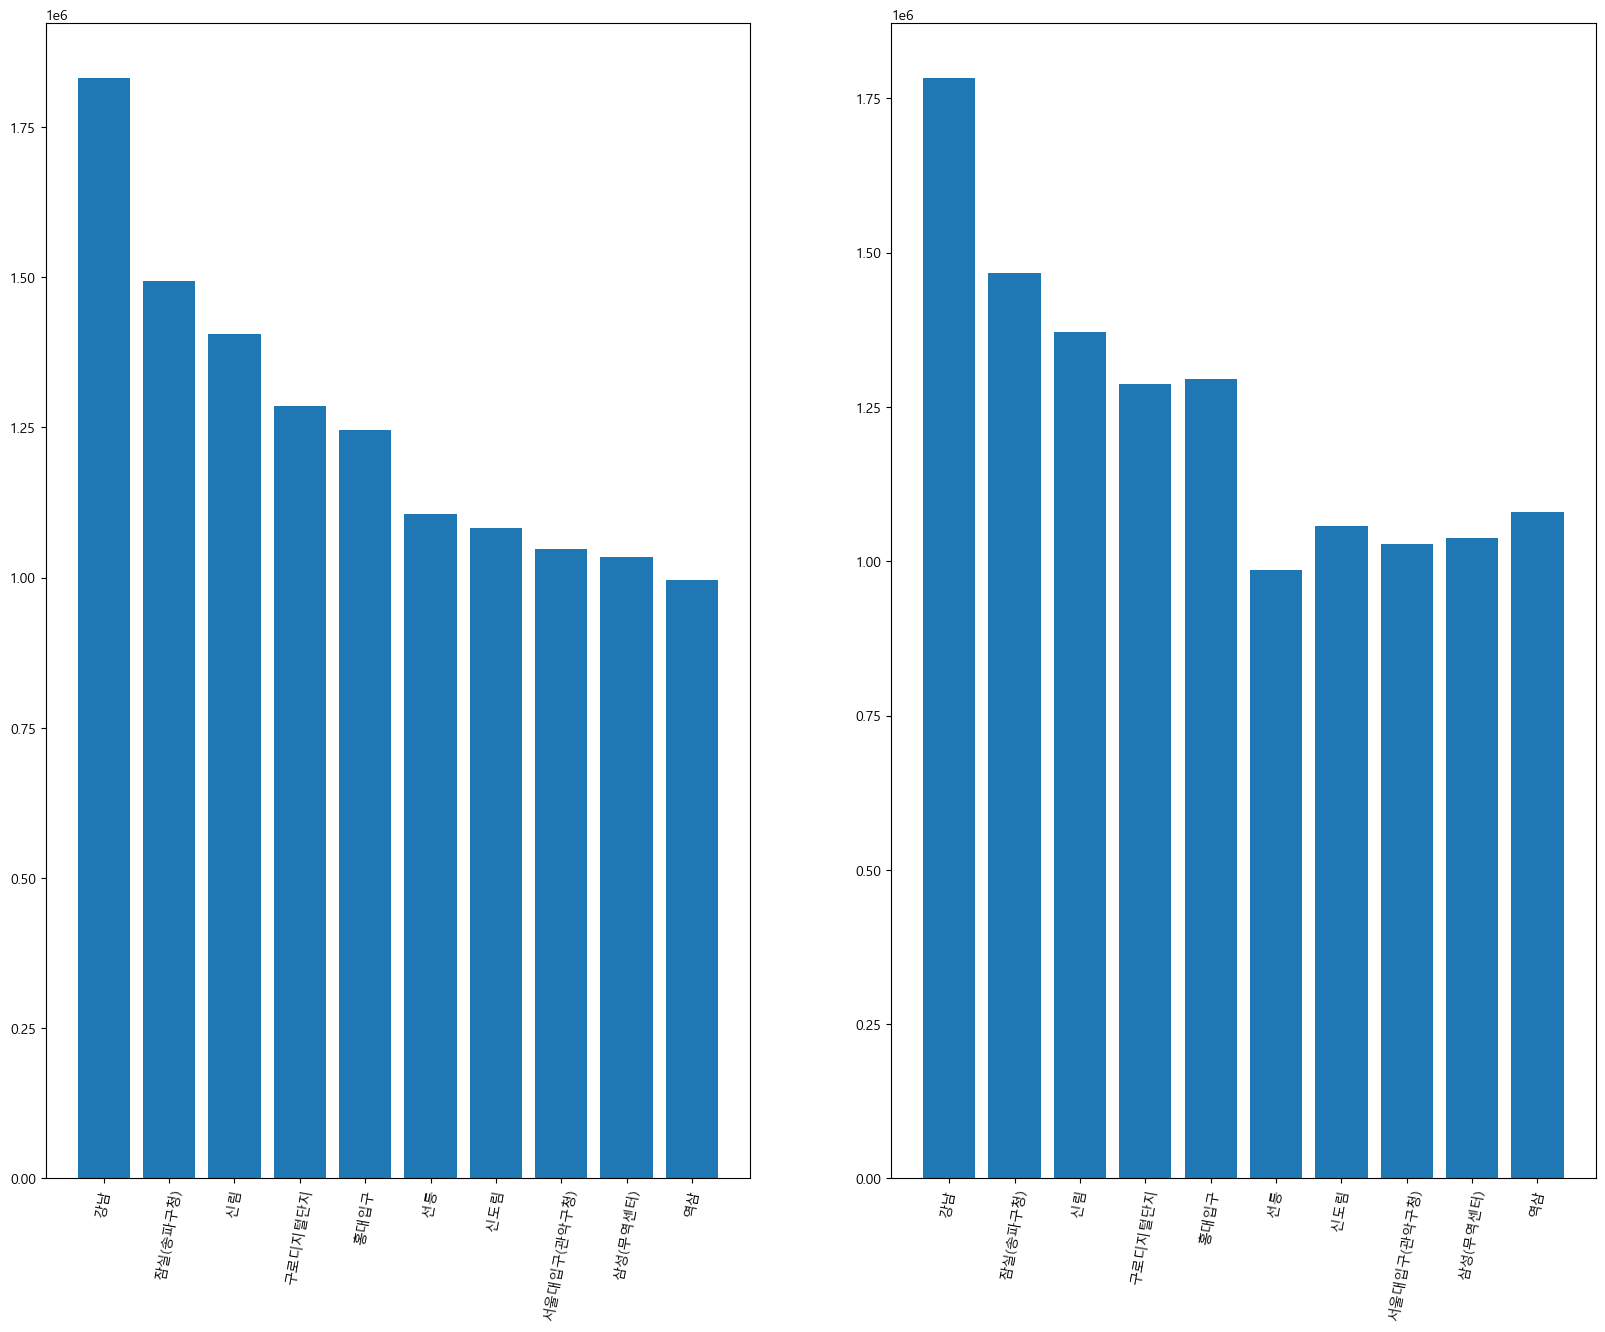

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
#승차
plt.bar(df_line_2_top_10['역명'], df_line_2_top_10['승차총승객수'])
plt.xticks(rotation=80)


#하차기준 top 10 추출
plt.subplot(1,2,2)
plt.bar(df_line_2_top_10['역명'], df_line_2_top_10['하차총승객수'])
plt.xticks(rotation=80)

plt.show()

In [ ]:
# 데이터 모양 정리하기
# 등록일자 drop, 사용일자 - 날짜로
# 총승객수 칼럼

In [ ]:
df_new = df.drop(columns='등록일자')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 654.5+ KB


In [ ]:
df_new['사용일자'] #2021-02-01 > datetype으로 

#apply가지고

def changeDate(data):
    year = str(data)[0:4]
    month = str(data)[4:6]
    day = str(data)[6:8]
    return year+ '-' + month +'-' +day

In [ ]:
df_new['사용일자1'] = df_new['사용일자'].apply(changeDate)
#df_new['사용일자1'] = df_new['사용일자'].astype('datetime64')
df_new['사용일자1']

In [ ]:
changeDate(20210201)

'2021-02-01'

In [ ]:
df_new['사용일자1'] = df_new['사용일자'].apply(changeDate)
df_new.head(5)

,사용일자,노선명,역명,승차총승객수,하차총승객수,사용일자1
0,20210201,중앙선,용문,1282,1259,2021-02-01
1,20210201,중앙선,지평,48,43,2021-02-01
2,20210201,중앙선,아신,415,413,2021-02-01
3,20210201,중앙선,양수,1463,1466,2021-02-01
4,20210201,중앙선,운길산,495,463,2021-02-01


In [ ]:
#'승차총승객수'와 '하차총승객수' 컬럼의 차이를 계산한 '승하차총승객수차이', '승하차총승객수' 컬럼을 생성하세요.
#  2호선 추출
# 2호선 역별 승하차총승객수차이, 승하차총승객수
# 상위 10개 역

In [35]:
df[df['노선명'] == '2호선'].describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.400000e+03,1400.000000,1400.000000,1.400000e+03
mean,2.021021e+07,20258.510000,20406.605714,2.021023e+07
std,8.080634e+00,17185.985981,17085.586712,2.746934e+01
min,2.021020e+07,226.000000,232.000000,2.021020e+07
25%,2.021021e+07,6744.250000,7071.000000,2.021021e+07
50%,2.021021e+07,15720.000000,15977.500000,2.021022e+07
75%,2.021022e+07,27772.250000,28254.500000,2.021022e+07
max,2.021023e+07,88904.000000,87891.000000,2.021030e+07


In [36]:
df[df['노선명'] == '5호선'].describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.484000e+03,1484.000000,1484.000000,1.484000e+03
mean,2.021021e+07,8774.492588,8727.040431,2.021023e+07
std,8.080470e+00,6515.721501,6509.612644,2.746878e+01
min,2.021020e+07,338.000000,390.000000,2.021020e+07
25%,2.021021e+07,4003.500000,4082.750000,2.021021e+07
50%,2.021021e+07,6635.000000,6709.000000,2.021022e+07
75%,2.021022e+07,12335.500000,11345.250000,2.021022e+07
max,2.021023e+07,32154.000000,32696.000000,2.021030e+07


In [ ]:
#5호선

df_line_5 = df[df['노선명'] == '5호선']


In [33]:
df.loc[df['노선명'] == '5호선', '역명'].nunique()

53

In [ ]:
df_line_5.groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()


,역명,승차총승객수,하차총승객수
0,강동,417865,393081
1,개롱,137130,143689
2,개화산,114266,110775
3,거여,170214,163019
4,고덕,190570,189102
5,공덕,296871,314855
6,광나루(장신대),282257,259111
7,광화문(세종문화회관),630350,640269
8,군자(능동),242935,266776
9,굽은다리(강동구민회관앞),206037,195306


In [ ]:
df['승하차총승객수차이'] = df['승차총승객수'] - df['하차총승객수']
df['승하차총승객수'] = df['승차총승객수'] + df['하차총승객수']

In [ ]:
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이,승하차총승객수
0,20210201,중앙선,용문,1282,1259,20210204,23,2541
1,20210201,중앙선,지평,48,43,20210204,5,91
2,20210201,중앙선,아신,415,413,20210204,2,828
3,20210201,중앙선,양수,1463,1466,20210204,-3,2929
4,20210201,중앙선,운길산,495,463,20210204,32,958
...,...,...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303,-20,452
16747,20210228,중앙선,양평,3299,3187,20210303,112,6486
16748,20210228,중앙선,원덕,322,304,20210303,18,626
16749,20210228,중앙선,용문,1899,1716,20210303,183,3615


In [ ]:
df_line_5 = df[df['노선명']== '5호선'].copy()
df_line_5

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이,승하차총승객수
419,20210201,5호선,하남풍산,4629,4624,20210204,5,9253
420,20210201,5호선,미사,12743,12609,20210204,134,25352
421,20210201,5호선,마천,5409,5566,20210204,-157,10975
422,20210201,5호선,거여,7499,7119,20210204,380,14618
423,20210201,5호선,개롱,6040,6218,20210204,-178,12258
...,...,...,...,...,...,...,...,...
16319,20210228,5호선,개롱,2752,3029,20210303,-277,5781
16320,20210228,5호선,거여,3453,3336,20210303,117,6789
16321,20210228,5호선,마천,3127,3382,20210303,-255,6509
16322,20210228,5호선,미사,6853,6878,20210303,-25,13731


In [ ]:
df_line_2 = df[df['노선명']== '2호선'].copy()
df_line_2

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이,승하차총승객수
532,20210201,2호선,용두(동대문구청),2365,2430,20210204,-65,4795
533,20210201,2호선,신정네거리,9269,9599,20210204,-330,18868
534,20210201,2호선,양천구청,6318,6738,20210204,-420,13056
535,20210201,2호선,도림천,1434,1469,20210204,-35,2903
536,20210201,2호선,신설동,3046,3110,20210204,-64,6156
...,...,...,...,...,...,...,...,...
16207,20210228,2호선,신설동,2806,2830,20210303,-24,5636
16208,20210228,2호선,도림천,480,477,20210303,3,957
16209,20210228,2호선,양천구청,3234,3281,20210303,-47,6515
16210,20210228,2호선,신정네거리,4814,4805,20210303,9,9619


In [ ]:
#내 답변 - 틀림
# df_line_5_top_10 = df_line_5.groupby('승하차총승객수'), ascending= False.head(10)

#지피티 답변
df_line_5_top_10 = (
    df_line_5.groupby('역명')[['승하차총승객수', '승하차총승객수차이']]
            .sum()
            .reset_index()
            .sort_values(by=['승하차총승객수' , '승하차총승객수차이'], ascending=[False,False])
            .head(10)
)


In [ ]:
df_line_5_top_10

,역명,승하차총승객수,승하차총승객수차이
7,광화문(세종문화회관),1270619,-9919
12,까치산,1261839,16635
52,화곡,1196728,34850
36,여의도,1142315,-11651
40,오목교(목동운동장앞),1032850,-35042
47,천호(풍납토성),826364,6676
23,발산,819786,-7990
0,강동,810946,24784
45,장한평,770748,2776
21,목동,763393,-31269


In [ ]:
df_line_2_top_10 = (
    df_line_2.groupby('역명')[['승하차총승객수', '승하차총승객수차이']]
            .sum()
            .reset_index()
            .sort_values(by=['승하차총승객수', '승하차총승객수차이'], ascending=[False, False])
            .head(10)
)

In [ ]:
df_line_2_top_10

,역명,승하차총승객수,승하차총승객수차이
0,강남,3612818,48602
42,잠실(송파구청),2959718,26942
27,신림,2776742,33048
4,구로디지털단지,2573140,-1934
49,홍대입구,2540954,-50248
26,신도림,2138194,25478
20,선릉,2091430,120930
33,역삼,2076344,-83850
18,서울대입구(관악구청),2075523,18565
16,삼성(무역센터),2072738,-3124


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '강남'),
  Text(1, 0, '잠실(송파구청)'),
  Text(2, 0, '신림'),
  Text(3, 0, '구로디지털단지'),
  Text(4, 0, '홍대입구'),
  Text(5, 0, '신도림'),
  Text(6, 0, '선릉'),
  Text(7, 0, '역삼'),
  Text(8, 0, '서울대입구(관악구청)'),
  Text(9, 0, '삼성(무역센터)')])

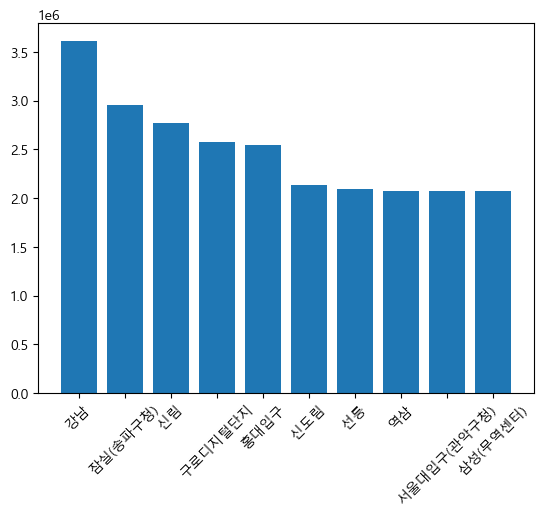

In [ ]:
plt.bar(df_line_2_top_10['역명'], df_line_2_top_10['승하차총승객수'])
plt.xticks(rotation=45)

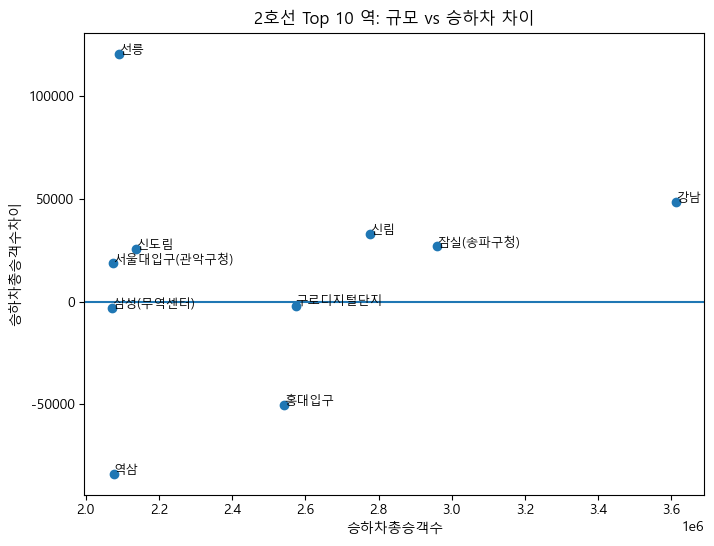

In [ ]:

#산점도
plt.figure(figsize=(8,6))
plt.scatter(
    df_line_2_top_10['승하차총승객수'],
    df_line_2_top_10['승하차총승객수차이']
)

plt.axhline(0) # 기준선
plt.title('2호선 Top 10 역: 규모 vs 승하차 차이')
plt.xlabel('승하차총승객수')
plt.ylabel('승하차총승객수차이')

#역명 라벨

for i in range(len(df_line_2_top_10)):
    plt.text(
        df_line_2_top_10['승하차총승객수'].iloc[i],
        df_line_2_top_10['승하차총승객수차이'].iloc[i],
        df_line_2_top_10['역명'].iloc[i],
        fontsize=9
    )

plt.show()

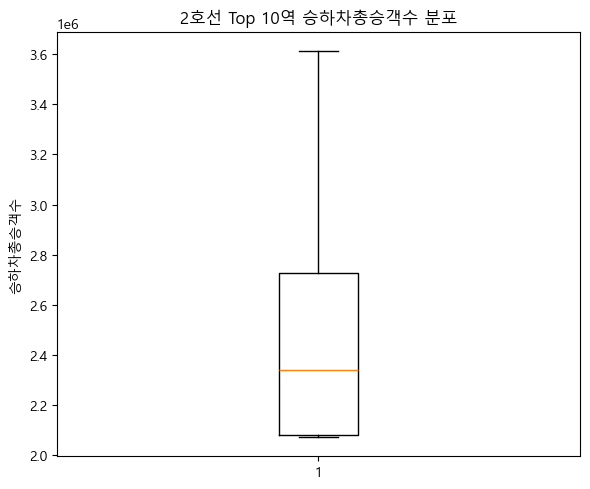

In [ ]:
plt.figure(figsize=(6,5))
plt.boxplot(df_line_2_top_10['승하차총승객수'])
plt.title('2호선 Top 10역 승하차총승객수 분포')
plt.ylabel('승하차총승객수')
plt.tight_layout()
plt.show()